<a href="https://colab.research.google.com/github/SenaKymk/MachineLearning201/blob/main/dogrusal_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Yapay Zeka Ve Veri Mühendisliği/Advertising.csv")

In [ ]:
df= df.iloc[:,1:len(df)]
df.head()

,radio,newspaper,sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,9.3
3,41.3,58.5,18.5
4,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   radio      200 non-null    float64
 1   newspaper  200 non-null    float64
 2   sales      200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


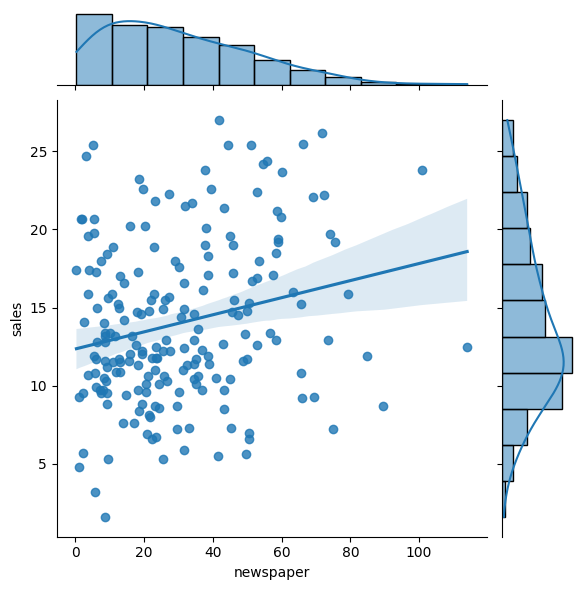

In [ ]:
import seaborn as sns
sns.jointplot(x= "newspaper",y= "sales", data = df, kind ="reg");

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X= df[["newspaper"]]
X.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


In [ ]:
y=df[["sales"]]

In [ ]:
reg= LinearRegression()

In [ ]:
model= reg.fit(X,y)

In [ ]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'featur

In [ ]:
model.intercept_

array([12.35140707])

burda intercept ile çağırdığımız şey beta 0

coef ile çağırdığımız şey beta1

In [ ]:
model.coef_

array([[0.0546931]])

In [ ]:
#rkare modelin açıklanabilirliği ile alakalı
# bağımlı değişkenlerdeki değişimin bağımsızlarca açıklanma yüzdesidir
model.score(X,y)

0.05212044544430516

In [ ]:
import matplotlib.pyplot as plt

(0.0, 28.27)

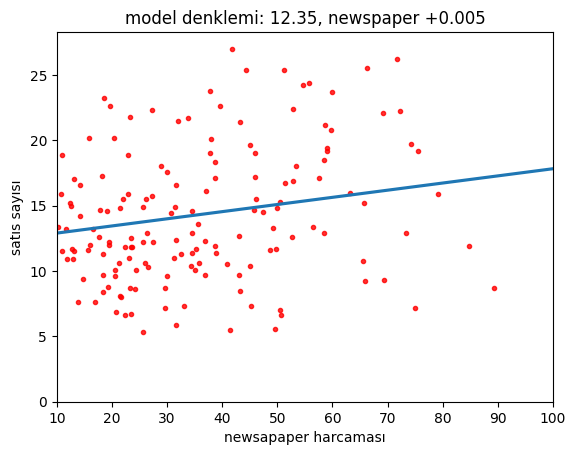

In [ ]:
g=sns.regplot(x="newspaper", y="sales", data=df, ci=None, scatter_kws={"color":"r", "s": 9})
g.set_title( "model denklemi: 12.35, newspaper +0.005")
g.set_xlabel("newsapaper harcaması")
g.set_ylabel("satıs sayısı")
plt.xlim(10,100)
plt.ylim(bottom=0)

In [ ]:
model.intercept_ + model.coef_*165

array([[21.37576832]])

In [ ]:
model.predict([[165]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21.37576832]])

In [ ]:
yeni_tahmin= [[5],[15],[30]]

In [ ]:
model.predict(yeni_tahmin)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.62487256],
       [13.17180355],
       [13.99220002]])

In [ ]:
gercek_y=y[0:10]

In [ ]:
tahmin_edilen_y = pd.DataFrame(model.predict(X) [0:10])

In [ ]:
hatalar= pd.concat([gercek_y, tahmin_edilen_y],axis=1)

In [ ]:
hatalar.columns=["gercek y","tahmin y"]
hatalar

,gercek y,tahmin y
0,22.1,16.136169
1,10.4,14.818066
2,9.3,16.141639
3,18.5,15.550953
4,12.9,15.545484
5,7.2,16.453389
6,11.8,13.636695
7,13.2,12.985847
8,4.8,12.406100
9,10.6,13.510901


In [ ]:
hatalar["hata"]= hatalar["gercek y"]-hatalar["tahmin y"]

In [ ]:
hatalar

,gercek y,tahmin y,hata
0,22.1,16.136169,5.963831
1,10.4,14.818066,-4.418066
2,9.3,16.141639,-6.841639
3,18.5,15.550953,2.949047
4,12.9,15.545484,-2.645484
5,7.2,16.453389,-9.253389
6,11.8,13.636695,-1.836695
7,13.2,12.985847,0.214153
8,4.8,12.406100,-7.606100
9,10.6,13.510901,-2.910901


In [ ]:
hatalar["hata kareler"]=hatalar["hata"]**2
hatalar

,gercek y,tahmin y,hata,hata kareler
0,22.1,16.136169,5.963831,35.567274
1,10.4,14.818066,-4.418066,19.519306
2,9.3,16.141639,-6.841639,46.808021
3,18.5,15.550953,2.949047,8.696876
4,12.9,15.545484,-2.645484,6.998586
5,7.2,16.453389,-9.253389,85.625216
6,11.8,13.636695,-1.836695,3.373448
7,13.2,12.985847,0.214153,0.045862
8,4.8,12.406100,-7.606100,57.852760
9,10.6,13.510901,-2.910901,8.473343


In [ ]:
np.mean(hatalar["hata kareler"]) #hata kareler ortalaması yani başarı kriteri

27.29606922516092

statsmodels ile model kurmak

In [ ]:

import statsmodels.api as sm



In [ ]:
lm= sm.OLS(y,X)

In [ ]:
model= lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              379.9
Date:                Sat, 21 Dec 2024   Prob (F-statistic):                    4.98e-48
Time:                        15:08:06   Log-Likelihood:                         -718.04
No. Observations:                 200   AIC:                                      1438.
Df Residuals:                     199   BIC:                                      1441.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
newspaper      0.3232      0.017     19.492      0.000       0.291       0.356
==============================================================================
Omnibus:                       10.866   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.018
Skew:                          -0.418   Prob(JB):                      0.00149
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

scitlearn ile model kurmak

Model tunning


In [ ]:
X.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


In [ ]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
